# data reading and cleaning

In [1]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/listings_fixed.xlsx')
df.head()


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,621960198566758912,The Historic Jesse Buel Farmhouse w Heated Pool,382970529,Thomas,FOURTEENTH WARD,42.66762,-73.79919,Entire home/apt,882,1,330
1,932642358896439680,Stylish top floor apt wparking,232967878,Diana,THIRTEENTH WARD,42.67224,-73.79301,Entire home/apt,106,1,86
2,53567589,Private Garden Apt in Downtown Albany|Pets All...,433096110,Brian,SIXTH WARD,42.65204,-73.76655,Entire home/apt,99,1,341
3,20671966,The Metropolitan,98744672,Bela,NINTH WARD,42.65532,-73.78244,Entire home/apt,58,2,248
4,24606880,The Western Suite,98744672,Bela,NINTH WARD,42.65431,-73.78178,Private room,50,2,340


In [2]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                374 non-null    int64  
 1   name              374 non-null    object 
 2   host_id           374 non-null    int64  
 3   host_name         373 non-null    object 
 4   neighbourhood     374 non-null    object 
 5   latitude          374 non-null    float64
 6   longitude         374 non-null    float64
 7   room_type         374 non-null    object 
 8   price             374 non-null    int64  
 9   minimum_nights    374 non-null    int64  
 10  availability_365  374 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 32.3+ KB


# Exploratory Data Analysis



In [3]:
# summary statistics
print(df.describe())
print(df.describe(include=['object']))


                 id       host_id    latitude   longitude       price  \
count  3.740000e+02  3.740000e+02  374.000000  374.000000  374.000000   
mean   6.771039e+17  2.387965e+08   42.657138  -73.776430  110.042781   
std    5.155307e+17  1.947985e+08    0.009573    0.019307   86.746145   
min    2.992450e+06  6.576000e+04   42.630660  -73.876490   24.000000   
25%    5.042566e+07  4.762598e+07   42.651610  -73.789175   68.000000   
50%    8.239341e+17  1.918503e+08   42.656369  -73.771815   93.000000   
75%    1.135595e+18  3.920749e+08   42.662445  -73.762749  122.750000   
max    1.365429e+18  6.773730e+08   42.714900  -73.738250  882.000000   

       minimum_nights  availability_365  
count      374.000000        374.000000  
mean         5.582888        245.893048  
std          9.379821        110.345664  
min          1.000000          0.000000  
25%          1.000000        153.000000  
50%          2.000000        281.500000  
75%          3.000000        345.000000  
max   

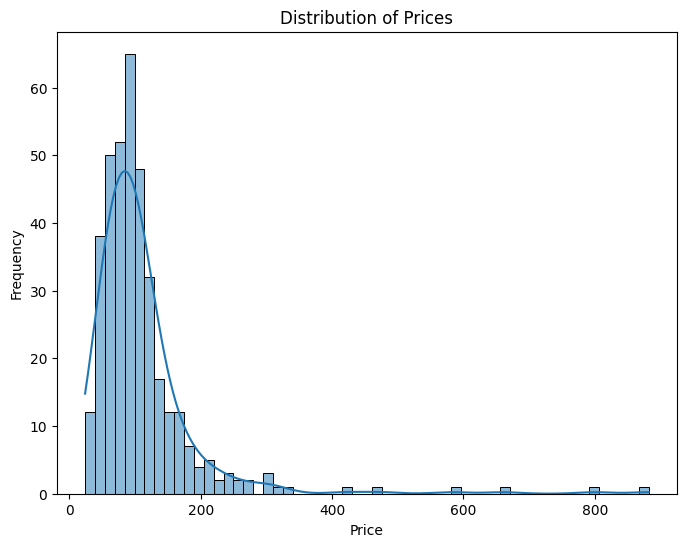

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of prices
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


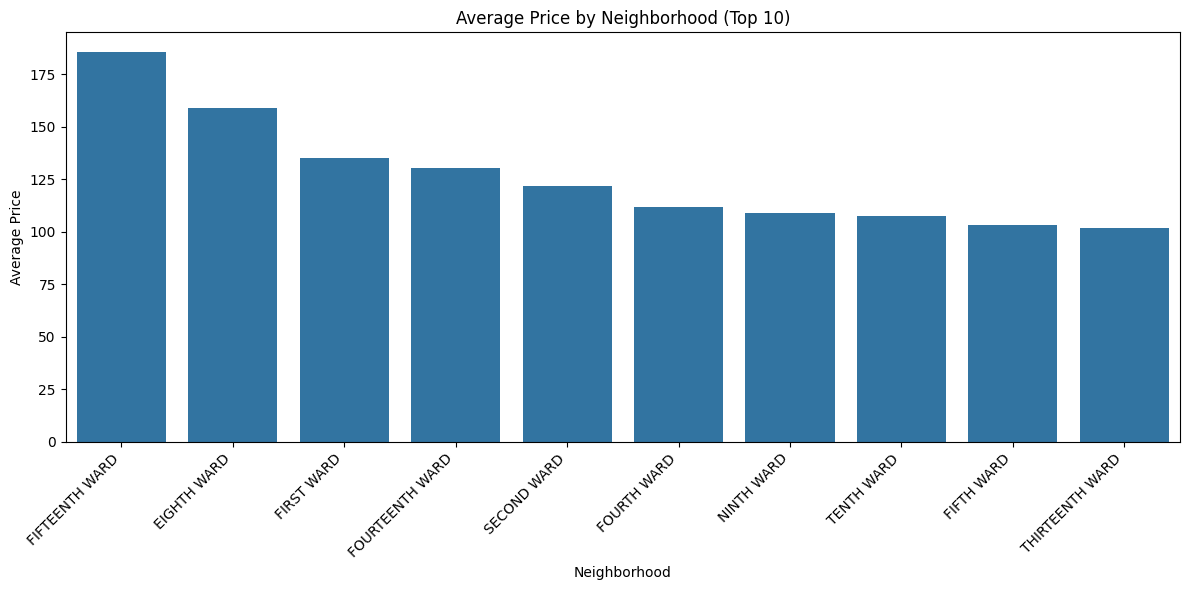

In [9]:
import matplotlib.pyplot as plt
# Calculate the average price by neighborhood
avg_price_neighb = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_neighb.index, y=avg_price_neighb.values)
plt.title('Average Price by Neighborhood (Top 10)')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


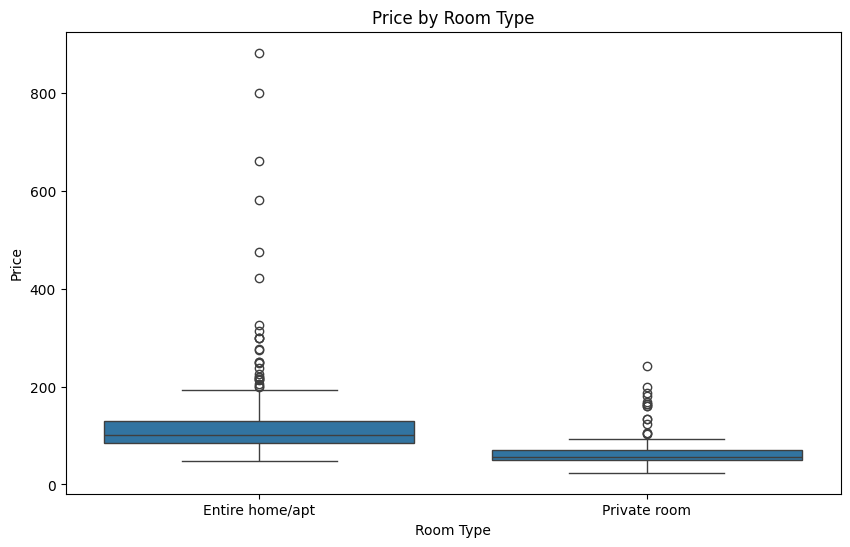

In [10]:
import matplotlib.pyplot as plt
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()